In [1]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
np.random.seed(9)

In [2]:
top_words=5000
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=top_words )
print(x_train[0])
print(y_train[0])

17465344/17464789 [==============================] - 1s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [3]:
max_review_length=600
x_train=sequence.pad_sequences(x_train,maxlen=max_review_length)
x_test=sequence.pad_sequences(x_test,maxlen=max_review_length)
print(x_train.shape)
print(x_train[0])
print(x_train[0].size)

(25000, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [4]:
embedding_vector_length=32
model=Sequential()
model.add(Embedding(top_words,embedding_vector_length,input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
history=model.fit(x_train,y_train,epochs=10,batch_size=256)
test_loss,test_accuracy=model.evaluate(x_test,y_test,verbose=2)

Epoch 1/10
98/98 [==============================] - 6s 61ms/step - loss: 0.6285 - accuracy: 0.6466
Epoch 2/10
98/98 [==============================] - 6s 60ms/step - loss: 0.3522 - accuracy: 0.8491
Epoch 3/10
98/98 [==============================] - 6s 60ms/step - loss: 0.2558 - accuracy: 0.8982
Epoch 4/10
98/98 [==============================] - 6s 60ms/step - loss: 0.2349 - accuracy: 0.9079
Epoch 5/10
98/98 [==============================] - 6s 60ms/step - loss: 0.1950 - accuracy: 0.9266
Epoch 6/10
98/98 [==============================] - 6s 60ms/step - loss: 0.1776 - accuracy: 0.9354
Epoch 7/10
98/98 [==============================] - 6s 60ms/step - loss: 0.1667 - accuracy: 0.9387
Epoch 8/10
98/98 [==============================] - 6s 60ms/step - loss: 0.1582 - accuracy: 0.9415
Epoch 9/10
98/98 [==============================] - 6s 60ms/step - loss: 0.1429 - accuracy: 0.9497
Epoch 10/10
98/98 [==============================] - 6s 60ms/step - loss: 0.1220 - accuracy: 0.9578
782/782 -

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

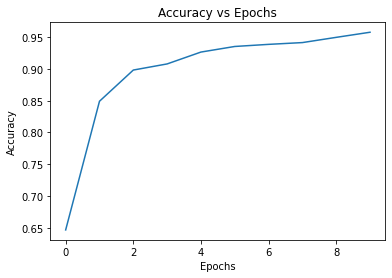

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
frame = pd.DataFrame(history.history)
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

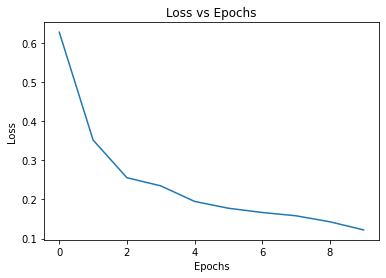

In [7]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [8]:
print(f"Test loss: {test_loss}"+   "\n"  f"Test accuracy: {test_accuracy}")


Test loss: 0.39492470026016235
Test accuracy: 0.8690400123596191


In [9]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(5000, 32)
